### 2.2 定量数据和定性数据  
为了完成对数据的判断，从区分度最高的顺序开始，即首先判断数据是定量的还是定性的？  
**定量数据**：本质上是数值，应该是衡量某样东西的数量。  
**定性数据**：本质上是类别，描述某样东西的性质。  

#### 按工作分类的工资

In [1]:
# 导包：
# 导入探索性数据分析所需的包
# 存储表格数据
import pandas as pd
# 数学计算包
import numpy as np
# 流行的数据可视化包
import matplotlib.pyplot as plt
# 另一个流行的数据可视化包
import seaborn as sns
# 允许行内渲染图形
%matplotlib inline
# 流行的数据可视化主题
plt.style.use('fivethirtyeight')

In [2]:
# 导入数据集
# 探索在旧金山做不同工作的工资
salary_ranges = pd.read_csv("../data/Salary_Ranges_by_Job_Classification.csv")

# 查看前几行
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [3]:
# 查看数据有多少行，是否有缺失值，以及每列的数据类型
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [4]:
# 另一种计算缺失值数量的方法
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [5]:
# describe方法查看一些定量数据的描述性统计
# 显示描述性统计
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [6]:
# 很明显 Union Code 不是定量的，因此需要一些工作来理解我们感兴趣的特征。
# 最值得注意的特征是一个定量列 Biweekly High Rate（双周最高工资）和一个定性列 Grade（工作种类）
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


#### 双周最高工资：定量列，代表某个部门的平均最高工资
#### 工作种类：工资对应的部门

In [7]:
# 删除工资的美元符号
salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [8]:
# 为了可视化，需要删除美元符号
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$', ''))

In [9]:
# 检查是否已删除干净
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [10]:
# 将 Biweekly High Rate 列中的数据转换为浮点数：
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

In [11]:
# 将工作种类转换为字符串
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [12]:
# 检查转换是否生效
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


#### 由于定量数据与定性数据之间的模糊性，使用一个更深层次的方法进行处理，称为**数据4个等级**。

### 2.3 数据的4个等级

#### 数据的4个等级：
1. 定类等级（nominal level）
2. 定序等级（ordinal level）
3. 定距等级（interval level）
4. 定比等级（ratio level）

了解数据的等级十分重要，因为它决定了可以执行的可视化类型和操作。

#### 2.3.1 定类等级
结构最弱，数据按名称分类，例如血型、物种和人名，这些数据都是定性的。

In [14]:
# 不能执行任何定量数学操作，例如加法或除法。但是我们可以计数：
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07420     9
06870     9
07170     9
Name: Grade, dtype: int64

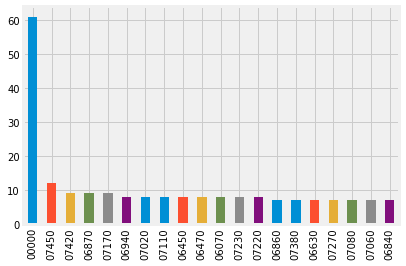

In [15]:
# 出现最多的工作种类00000是**众数**
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

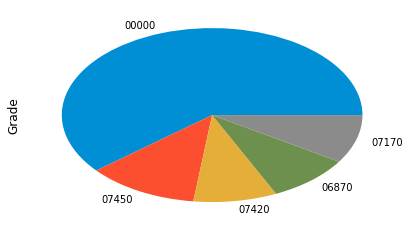

In [17]:
# 也可以绘制饼图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

#### 2.3.2 定序等级
定序等级继承了定类等级的所有属性，而且附加有更重要的附加属性：**自然排序**  
可以执行的数学操作：1. 计数；2. 比较； 3. 排序。  
因为可以排序和比较，所以能计算中位数和百分位数。  
对于中位数和百分位数，可以绘制茎叶图和箱线图。  
例子包括：1-10评分，考试成绩（A, B, C, D, F）  

In [ ]:
# 多少人喜欢旧金山国际机场数据集
